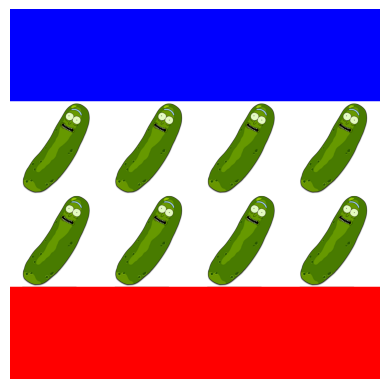

In [103]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output')
image = Image.open(loc_input)
np_image = np.array(image)

# Get the size of the original image
img_height, img_width = np_image.shape[:2]

# Initialize a new array to hold the tiled image
tiled_height = img_height * 4
tiled_width = img_width * 4
tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

# Manually repeat the image by copying it into the correct positions
for i in range(4): # Vertical replication
    for j in range(4): # Horizontal replication
        vertical_start = i * img_height
        vertical_end = (i + 1) * img_height
        horizontal_start = j * img_width
        horizontal_end = (j + 1) * img_width
        tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np_image

# Fill the top row with all red pickle_ricks
tiled_image[:img_height, :, 0] = 0 # Blue
tiled_image[:img_height, :, 1] = 0 # Green
tiled_image[:img_height, :, 2] = 255 # Red
tiled_image[:img_height, :, 3] = 255 # Alpha

# Fill the bottom row with all blue pickle_ricks
tiled_image[-img_height:, :, 0] = 255 # Blue
tiled_image[-img_height:, :, 1] = 0 # Green
tiled_image[-img_height:, :, 2] = 0 # Red
tiled_image[-img_height:, :, 3] = 255 # Alpha

# Display the tiled image
plt.imshow(tiled_image)
plt.axis('off') # Hide the axis
plt.show()

# Save the image
output_image = Image.fromarray(tiled_image)
output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_custom.png'))

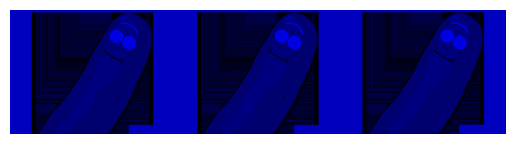

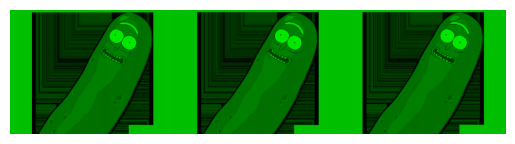

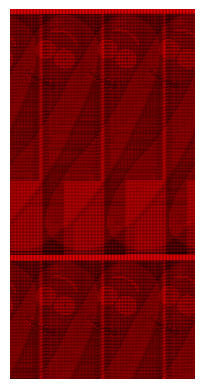

(1024, 1024, 4)

In [104]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output')
loc_intermezzo = os.path.join('data', 'intermezzo')
image = Image.open(loc_input)
np_image = np.array(image)

# Get the size of the original image
img_height, img_width = np_image.shape[:2]

pickle_temp = np_image.repeat(2, axis=1)
double_sized= pickle_temp.repeat(2, axis=0)
v_stack = np.append(np_image, np_image, axis=0)
h_stack = np.tile(np_image, (4,1))

# Save the image
#temp_double = Image.fromarray(double_sized)
#temp_double.save(os.path.join(loc_intermezzo, 'double_temp'))

#temp_vstack = Image.fromarray(double_sized)
#temp_hstack = Image.fromarray(double_sized)
                  
def alterColor(image, color):
    img = Image.fromarray(image.astype('uint8'), 'RGB')

    for x in range(0, img.width):
        for y in range(0, img.height):
            pixel = img.getpixel((x, y))
            r, g, b = pixel
            if color == 0: 
                img.putpixel((x, y), (r, 0, 0)) # setting green and blue values to zero
            elif color == 1: 
                img.putpixel((x, y), (0, g, 0)) # setting red and blue to zero
            else: 
                img.putpixel((x, y), (0, 0, b)) # setting green and red values to zero
    return np.array(img)


def createArt(loc_input):
    
    vtop = createTiledImage(loc_input, (1, 4), 2)
    hside = createTiledImage(loc_input, (2, 1), 0)
    vbottom = createTiledImage(loc_input, (1, 4), 1)
    center = np_image.repeat(2, axis=1)
    double_sized= center.repeat(2, axis=0)
    
    new_image = append_arrays(double_sized, hside, "horizontal")
    new_image = append_arrays(hside, new_image, "horizontal")
    new_image = append_arrays(new_image, vbottom, "vertical")
    new_image = append_arrays(vtop, new_image, "vertical")
    
    output_image = Image.fromarray(new_image)
    output_image.save(os.path.join("data", "output", 'pickle_art_nouveau.png'))

    return new_image
altered_blue = alterColor(h_stack, 2)
altered_green = alterColor(h_stack, 1)
altered_red = alterColor(v_stack, 0)

# Display the tiled image
plt.imshow(altered_blue)
plt.axis('off') # Hide the axis
plt.show()

plt.imshow(altered_green)
plt.axis('off') # Hide the axis
plt.show()

plt.imshow(altered_red)
plt.axis('off') # Hide the axis
plt.show()

v_stack.shape
h_bottom.shape
double_rick.shape
# Save the image
#output_image = Image.fromarray(tiled_image)
#output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_border.png'))

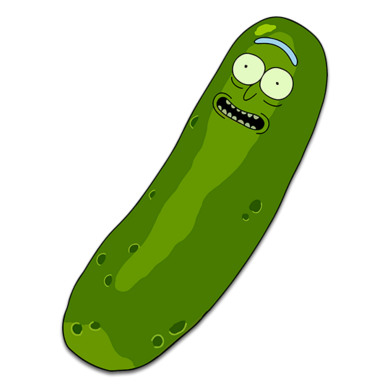

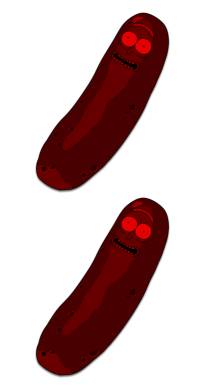

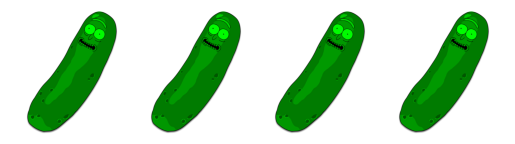

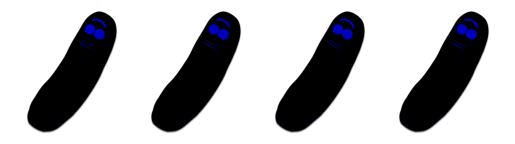

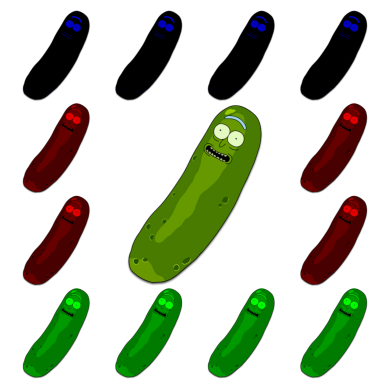

In [105]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def createTiledImage(loc_input, replication_factor, color):
    image = Image.open(loc_input)
    np_image = np.array(image)

    # Get the size of the original image
    img_height, img_width = np_image.shape[:2]

    # Initialize a new array to hold the tiled image
    tiled_height = img_height * replication_factor[0]
    tiled_width = img_width * replication_factor[1]
    tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

    # Manually repeat the image by copying it into the correct positions
    for i in range(replication_factor[0]): # Vertical replication
        for j in range(replication_factor[1]): # Horizontal replication
            vertical_start = i * img_height
            vertical_end = (i + 1) * img_height
            horizontal_start = j * img_width
            horizontal_end = (j + 1) * img_width
            
            # Load the original image
            original_image = Image.open(loc_input)
            original_image = original_image.convert("RGBA")
            
            # Change the color and intensity of the original image
            altered_image = alterColor(original_image, img_width, img_height, color)
            
            # Copy the altered image into the tiled image
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np.array(altered_image)

    # Return the tiled image
    return tiled_image

def alterColor(image, width, height, color):
    img = image.convert("RGBA")

    for x in range(0, width):
        for y in range(0, height):
            pixel = img.getpixel((x, y))
            r, g, b, a = pixel
            if color == 0:
                img.putpixel((x, y), (r, 0, 0, a)) # setting green and blue values to zero
            elif color == 1:
                img.putpixel((x, y), (0, g, 0, a)) # setting green and blue values to zero
            else: 
                img.putpixel((x, y), (0, 0, b, a)) # setting green and blue values to zero
    return img

# specify the image location
#loc_input = os.path.join("data", "input", "pickle_rick.png")
#loc_output = os.path.join("data", "output")

# create the tiled image

blue_ribbon = createTiledImage(loc_input, (1, 4), 2)
red_ribbon = createTiledImage(loc_input, (2, 1), 0)
green_ribbon = createTiledImage(loc_input, (1, 4), 1)
pickle_temp = np_image.repeat(2, axis=1)
double_sized= pickle_temp.repeat(2, axis=0)

#result = np.concatenate((red_ribbon,double_sized) ,axis=2)
#result = np.append(result, red_ribbon,axis=1)
#result = np.append(blue_ribbon, result, axis=0)
#result = np.append(result, green_ribbon, axis=1)
plt.imshow(double_sized)
plt.axis('off') # Hide the axis
plt.show()

plt.imshow(red_ribbon)
plt.axis('off') # Hide the axis
plt.show()
# Display the tiled image

plt.imshow(green_ribbon)
plt.axis('off') # Hide the axis
plt.show()
# Display the tiled image

plt.imshow(blue_ribbon)
plt.axis('off') # Hide the axis
plt.show()
# Display the tiled image

#double_sized.shape
red_ribbon.shape

def append_arrays(a, b, direction):
    if direction == "horizontal":
        appended_array = np.concatenate((a, b), axis=1)
    elif direction == "vertical":
        appended_array = np.concatenate((a, b), axis=0)
    
    return appended_array

new_image = append_arrays(double_sized, red_ribbon, "horizontal")
new_image = append_arrays(red_ribbon, new_image, "horizontal")
new_image = append_arrays(new_image, green_ribbon, "vertical")
new_image = append_arrays(blue_ribbon, new_image, "vertical")


plt.imshow(new_image)
plt.axis('off') # Hide the axis
plt.show()

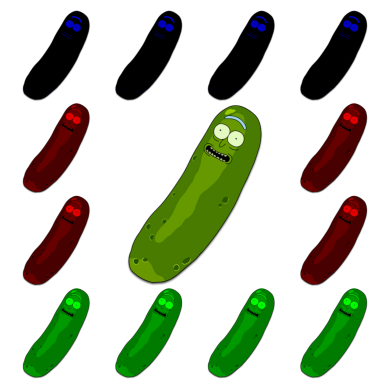

In [106]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

loc_input = os.path.join("data", "input", "pickle_rick.png")
loc_output = os.path.join("data", "output")

def createTiledImage(loc_input, replication_factor, color):
    image = Image.open(loc_input)
    np_image = np.array(image)

    # Get the size of the original image
    img_height, img_width = np_image.shape[:2]

    # Initialize a new array to hold the tiled image
    tiled_height = img_height * replication_factor[0]
    tiled_width = img_width * replication_factor[1]
    tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

    # Manually repeat the image by copying it into the correct positions
    for i in range(replication_factor[0]): # Vertical replication
        for j in range(replication_factor[1]): # Horizontal replication
            vertical_start = i * img_height
            vertical_end = (i + 1) * img_height
            horizontal_start = j * img_width
            horizontal_end = (j + 1) * img_width
            
            # Load the original image
            original_image = Image.open(loc_input)
            original_image = original_image.convert("RGBA")
            
            # Change the color and intensity of the original image
            altered_image = alterColor(original_image, img_width, img_height, color)
            
            # Copy the altered image into the tiled image
            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np.array(altered_image)

    # Return the tiled image
    return tiled_image

def alterColor(image, width, height, color):
    img = image.convert("RGBA")

    for x in range(0, width):
        for y in range(0, height):
            pixel = img.getpixel((x, y))
            r, g, b, a = pixel
            if color == 0:
                img.putpixel((x, y), (r, 0, 0, a)) # setting green and blue values to zero
            elif color == 1:
                img.putpixel((x, y), (0, g, 0, a)) # setting green and blue values to zero
            else: 
                img.putpixel((x, y), (0, 0, b, a)) # setting green and blue values to zero
    return img

# specify the image location


# create the tiled image


def append_arrays(a, b, direction):
    if direction == "horizontal":
        appended_array = np.concatenate((a, b), axis=1)
    elif direction == "vertical":
        appended_array = np.concatenate((a, b), axis=0)
    
    return appended_array


def createArt(loc_input):
    
    vtop = createTiledImage(loc_input, (1, 4), 2)
    hside = createTiledImage(loc_input, (2, 1), 0)
    vbottom = createTiledImage(loc_input, (1, 4), 1)
    center = np_image.repeat(2, axis=1)
    double_sized= center.repeat(2, axis=0)
    
    new_image = append_arrays(double_sized, hside, "horizontal")
    new_image = append_arrays(hside, new_image, "horizontal")
    new_image = append_arrays(new_image, vbottom, "vertical")
    new_image = append_arrays(vtop, new_image, "vertical")
    
    output_image = Image.fromarray(new_image)
    output_image.save(os.path.join("data", "output", 'pickle_art_nouveau.png'))

    return new_image

pickle_art = createArt(loc_input)

plt.imshow(new_image)
plt.axis('off') # Hide the axis
plt.show()